In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Superstore dataset
df = pd.read_csv('C:\\data analytics projects\\Superstore.csv', encoding='latin1')

df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Check for missing values and data types
df.info()

# Quick statistical overview
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
# Drop columns that aren't needed for analysis, e.g., 'Row ID', 'Order ID'
df.drop(columns=['Row ID', 'Order ID', 'Customer ID'], inplace=True)

# Drop rows with any missing values in critical columns like 'Sales', 'Quantity', 'Profit'
df.dropna(subset=['Sales', 'Quantity', 'Profit'], inplace=True)


In [5]:
# Calculate total revenue generated for each product
df['Total_Sales'] = df['Quantity'] * df['Sales']

# Calculate profit margin
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Inventory Turnover Ratio = Total Sales / (Average Inventory)
# Here we'll assume that 'Quantity' represents the average stock levels available
df['Inventory_Turnover_Ratio'] = df['Quantity'] / df['Quantity'].mean()

df.head()


,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Total_Sales,Profit_Margin,Inventory_Turnover_Ratio
0,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,523.9200,0.1600,0.527764
1,11/8/2016,11/11/2016,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2195.8200,0.3000,0.791646
2,6/12/2016,6/16/2016,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,29.2400,0.4700,0.527764
3,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4787.8875,-0.4000,1.319410
4,10/11/2015,10/18/2015,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,44.7360,0.1125,0.527764


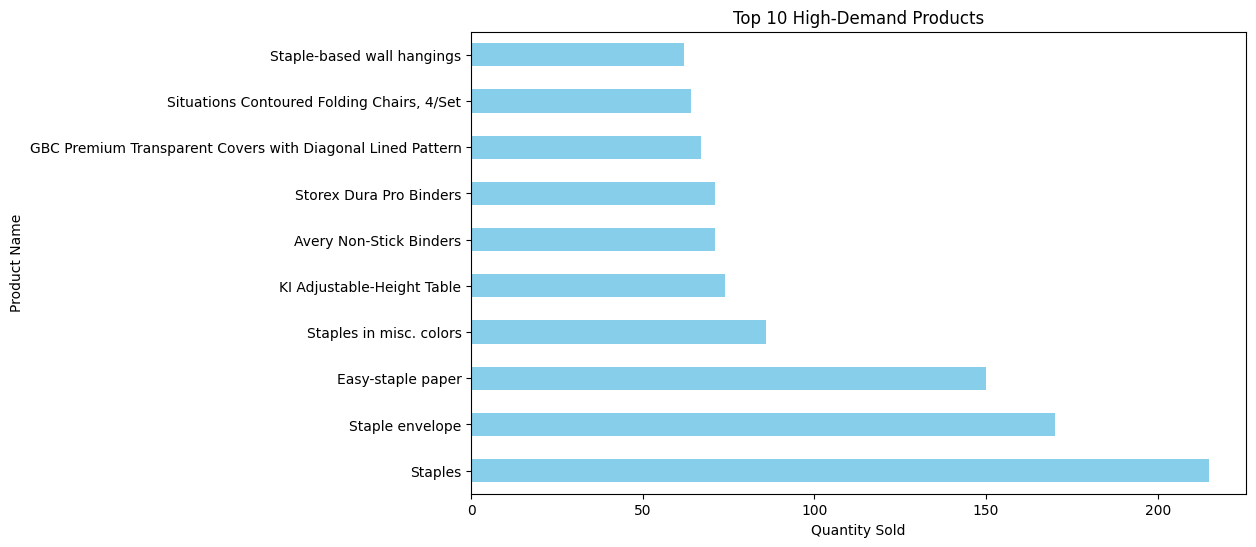

In [6]:
# Top 10 products by sales quantity
top_products = df.groupby('Product Name')['Quantity'].sum().nlargest(10)
top_products.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Top 10 High-Demand Products')
plt.xlabel('Quantity Sold')
plt.show()


In [7]:
# Filter products with low inventory turnover ratio
slow_moving_products = df[df['Inventory_Turnover_Ratio'] < 1.0]

# Display a subset of slow-moving products
slow_moving_products[['Product Name', 'Inventory_Turnover_Ratio']].head(10)


,Product Name,Inventory_Turnover_Ratio
0,Bush Somerset Collection Bookcase,0.527764
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",0.791646
2,Self-Adhesive Address Labels for Typewriters b...,0.527764
4,Eldon Fold 'N Roll Cart System,0.527764
8,DXL Angle-View Binders with Locking Rings by S...,0.791646
12,Xerox 1967,0.791646
13,Fellowes PB200 Plastic Comb Binding Machine,0.791646
15,Storex DuraTech Recycled Plastic Frosted Binders,0.791646
17,Fellowes Super Stor/Drawer,0.527764
18,Newell 341,0.527764


In [8]:
print(df.columns)


Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit', 'Total_Sales', 'Profit_Margin',
       'Inventory_Turnover_Ratio'],
      dtype='object')


In [12]:
# Calculate Profit Margin as a percentage
df['Profit_Margin_Percent'] = (df['Profit'] / df['Sales']) * 100

# Top 10 products by Profit Margin
top_margin_products = df[['Product Name', 'Profit_Margin_Percent']].sort_values(by='Profit_Margin_Percent', ascending=False).head(10)
print("Top 10 Products by Profit Margin:")
print(top_margin_products)



Top 10 Products by Profit Margin:
                                           Product Name  Profit_Margin_Percent
2323                               Aluminum Screw Posts                   50.0
1708  "While you Were Out" Message Book, One Form pe...                   50.0
4578                       Vinyl Sectional Post Binders                   50.0
4584  White Business Envelopes with Contemporary Sea...                   50.0
6463                                          Avery 505                   50.0
5561               Ibico Recycled Grain-Textured Covers                   50.0
2780                                          Avery 505                   50.0
1128                     Brown Kraft Recycled Envelopes                   50.0
4611  XtraLife ClearVue Slant-D Ring Binders by Card...                   50.0
1140                      Cardinal Slant-D Ring Binders                   50.0


In [13]:
# Calculate Revenue as Quantity * Sales
df['Revenue'] = df['Quantity'] * df['Sales']

# Calculate Cost based on Revenue and Discount
df['Cost'] = df['Revenue'] * (1 - df['Discount'])


<Figure size 640x480 with 0 Axes>

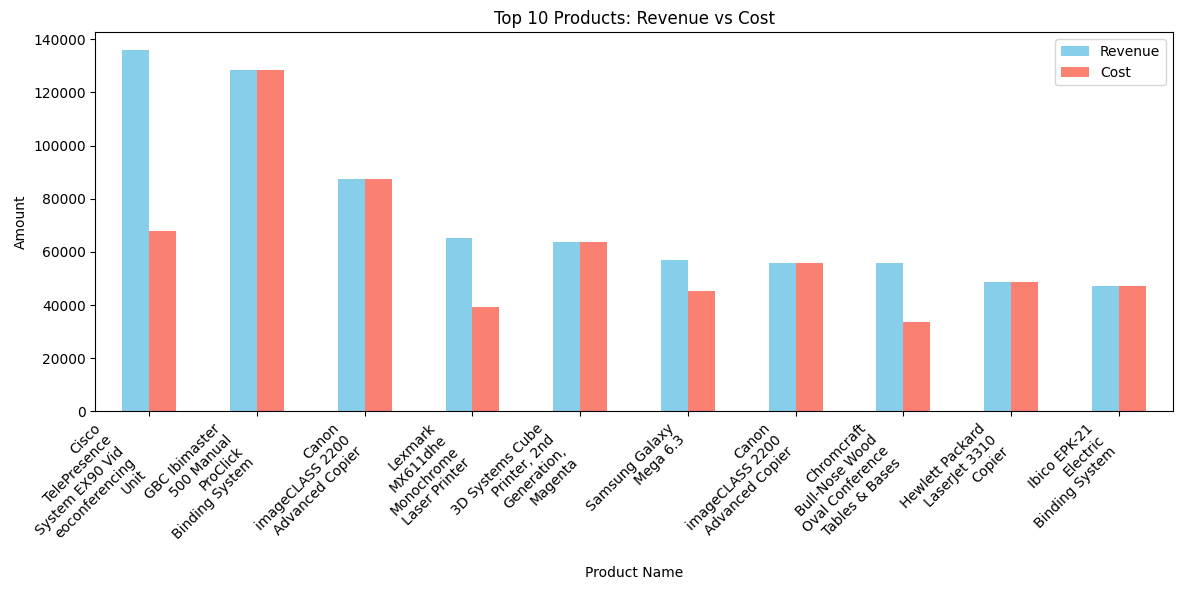

In [15]:
import matplotlib.pyplot as plt
from textwrap import wrap

# Clear previous figures
plt.clf()

# Sort top 10 products by revenue for visualization
top_revenue_products = df[['Product Name', 'Revenue', 'Cost']].sort_values(by='Revenue', ascending=False).head(10)

# Wrap product names to avoid long names cutting off
wrapped_names = ['\n'.join(wrap(name, 15)) for name in top_revenue_products['Product Name']]

# Plot Revenue and Cost comparison
top_revenue_products.set_index('Product Name')[['Revenue', 'Cost']].plot(kind='bar', color=['skyblue', 'salmon'], figsize=(12, 6))

# Updating x-ticks with wrapped names
plt.xticks(ticks=range(len(wrapped_names)), labels=wrapped_names, rotation=45, ha='right')

# Adding labels and title
plt.title('Top 10 Products: Revenue vs Cost')
plt.xlabel('Product Name')
plt.ylabel('Amount')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [16]:
# Define a threshold for low turnover products, e.g., turnover ratio < 1
slow_moving_products = df[df['Inventory_Turnover_Ratio'] < 1]
print("Slow-Moving Products with Low Inventory Turnover:")
print(slow_moving_products[['Product Name', 'Inventory_Turnover_Ratio']])


Slow-Moving Products with Low Inventory Turnover:
                                           Product Name  \
0                     Bush Somerset Collection Bookcase   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...   
2     Self-Adhesive Address Labels for Typewriters b...   
4                        Eldon Fold 'N Roll Cart System   
8     DXL Angle-View Binders with Locking Rings by S...   
...                                                 ...   
9987  Logitech G430 Surround Sound Gaming Headset wi...   
9989                             Ultra Door Pull Handle   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   
9991                              Aastra 57i VoIP phone   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...   

      Inventory_Turnover_Ratio  
0                     0.527764  
1                     0.791646  
2                     0.527764  
4                     0.527764  
8                     0.791646  
...                        ...  
9987      

Top 10 Revenue-Generating Products:
                                           Product Name     Revenue
2697  Cisco TelePresence System EX90 Videoconferenci...  135830.880
9039   GBC Ibimaster 500 Manual ProClick Binding System  128605.620
6826              Canon imageCLASS 2200 Advanced Copier   87499.750
165           Lexmark MX611dhe Monochrome Laser Printer   65279.616
4277   3D Systems Cube Printer, 2nd Generation, Magenta   63699.510
4297                            Samsung Galaxy Mega 6.3   56782.648
8153              Canon imageCLASS 2200 Advanced Copier   55999.840
9639  Chromcraft Bull-Nose Wood Oval Conference Tabl...   55869.372
7666               Hewlett Packard LaserJet 3310 Copier   48599.190
4098               Ibico EPK-21 Electric Binding System   47249.750


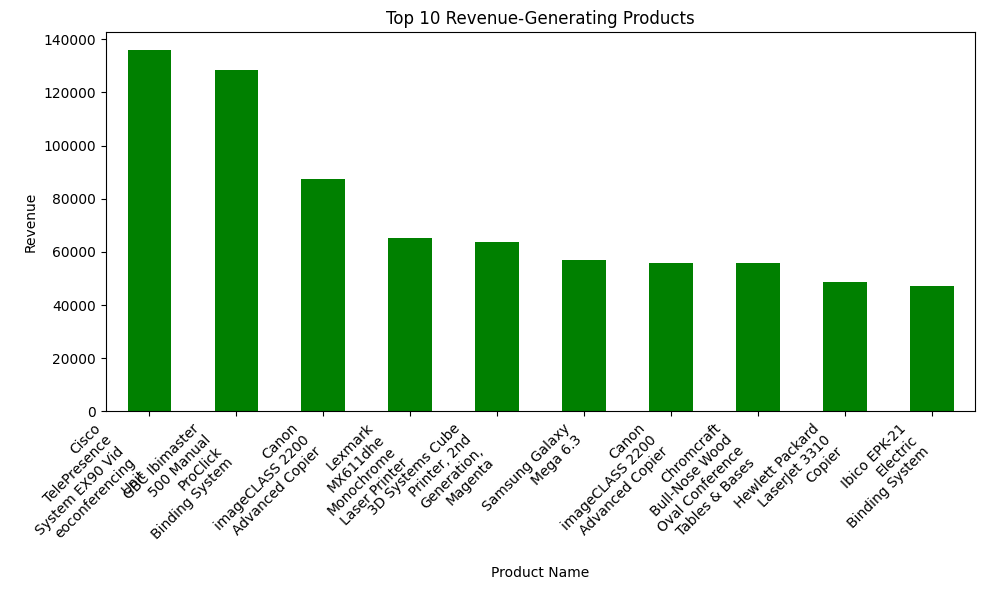

In [18]:
# Top 10 Revenue Generating Products
top_revenue_products = df[['Product Name', 'Revenue']].sort_values(by='Revenue', ascending=False).head(10)
print("Top 10 Revenue-Generating Products:")
print(top_revenue_products)

# Wrap product names to avoid long names cutting off
wrapped_names = ['\n'.join(wrap(name, 15)) for name in top_revenue_products['Product Name']]

# Visualization
top_revenue_products.set_index('Product Name')['Revenue'].plot(kind='bar', color='green', figsize=(10, 6))

# Updating x-ticks with wrapped names
plt.xticks(ticks=range(len(wrapped_names)), labels=wrapped_names, rotation=45, ha='right')

# Adding labels and title
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Product Name')
plt.ylabel('Revenue')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


In [19]:
# Sort by Revenue
df = df.sort_values(by='Revenue', ascending=False)
df['Cumulative_Revenue'] = df['Revenue'].cumsum()
df['Revenue_Percent'] = 100 * df['Cumulative_Revenue'] / df['Revenue'].sum()

# Classify into ABC categories
df['ABC_Category'] = np.where(df['Revenue_Percent'] <= 80, 'A', 
                      np.where(df['Revenue_Percent'] <= 95, 'B', 'C'))

# Count products in each category
abc_counts = df['ABC_Category'].value_counts()
print("ABC Inventory Classification Counts:")
print(abc_counts)

# Display products in each category (A, B, C)
abc_products = df[['Product Name', 'Revenue', 'Revenue_Percent', 'ABC_Category']]
print("Products by ABC Classification:")
print(abc_products.head(10))


ABC Inventory Classification Counts:
ABC_Category
C    6046
B    2386
A    1562
Name: count, dtype: int64
Products by ABC Classification:
                                           Product Name     Revenue  \
2697  Cisco TelePresence System EX90 Videoconferenci...  135830.880   
9039   GBC Ibimaster 500 Manual ProClick Binding System  128605.620   
6826              Canon imageCLASS 2200 Advanced Copier   87499.750   
165           Lexmark MX611dhe Monochrome Laser Printer   65279.616   
4277   3D Systems Cube Printer, 2nd Generation, Magenta   63699.510   
4297                            Samsung Galaxy Mega 6.3   56782.648   
8153              Canon imageCLASS 2200 Advanced Copier   55999.840   
9639  Chromcraft Bull-Nose Wood Oval Conference Tabl...   55869.372   
7666               Hewlett Packard LaserJet 3310 Copier   48599.190   
4098               Ibico EPK-21 Electric Binding System   47249.750   

      Revenue_Percent ABC_Category  
2697         1.182365            A  
9039  

In [20]:
# Assume reorder level threshold
df['Reorder_Level'] = df['Quantity'].mean() * 0.5  # Example reorder level at half of average stock
df['Needs_Reorder'] = df['Quantity'] < df['Reorder_Level']

# Filter products that need to be reordered
reorder_products = df[df['Needs_Reorder']]
print("Products Needing Reorder:")
print(reorder_products[['Product Name', 'Quantity', 'Reorder_Level']])


Products Needing Reorder:
                                           Product Name  Quantity  \
8760  Fellowes PB500 Electric Punch Plastic Comb Bin...         1   
6363     3D Systems Cube Printer, 2nd Generation, White         1   
2239  Fellowes PB500 Electric Punch Plastic Comb Bin...         1   
9734         GBC DocuBind TL300 Electric Binding System         1   
529   Martin Yale Chadless Opener Electric Letter Op...         1   
...                                                 ...       ...   
2106                                  Acco 3-Hole Punch         1   
4711                      Avery Round Ring Poly Binders         1   
8658  Avery Durable Slant Ring Binders With Label Ho...         1   
9292           Acco Suede Grain Vinyl Round Ring Binder         1   
4101  Hoover Replacement Belt for Commercial Guardsm...         1   

      Reorder_Level  
8760       1.894787  
6363       1.894787  
2239       1.894787  
9734       1.894787  
529        1.894787  
...          

<Figure size 1000x600 with 0 Axes>

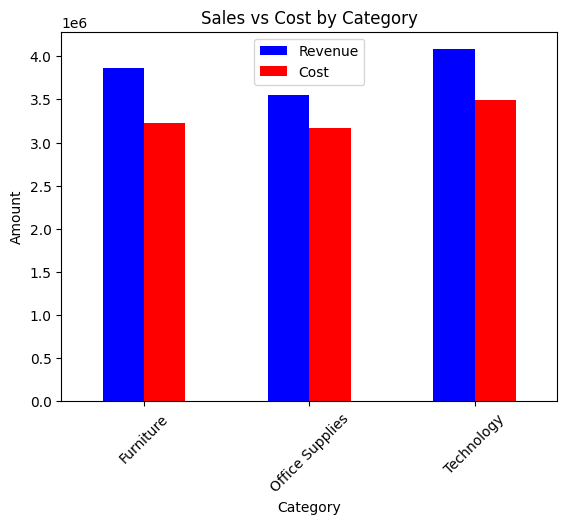

In [21]:
# Group by Category to get total sales and cost
category_sales_cost = df.groupby('Category').agg({'Revenue': 'sum', 'Cost': 'sum'}).reset_index()

# Visualization of Sales vs Cost by Category
plt.figure(figsize=(10, 6))
category_sales_cost.set_index('Category')[['Revenue', 'Cost']].plot(kind='bar', color=['blue', 'red'])
plt.title('Sales vs Cost by Category')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()


In [22]:
# Calculate average days in inventory if 'Order Date' is available
df['Order_Date'] = pd.to_datetime(df['Order Date'])
df['Days_in_Inventory'] = (pd.Timestamp.today() - df['Order_Date']).dt.days

# View products with high Days_in_Inventory (e.g., 90+ days)
long_inventory_items = df[df['Days_in_Inventory'] > 90]
print("Products with High Days in Inventory:")
print(long_inventory_items[['Product Name', 'Days_in_Inventory']])


Products with High Days in Inventory:
                                           Product Name  Days_in_Inventory
2697  Cisco TelePresence System EX90 Videoconferenci...               3882
9039   GBC Ibimaster 500 Manual ProClick Binding System               2877
6826              Canon imageCLASS 2200 Advanced Copier               2953
165           Lexmark MX611dhe Monochrome Laser Printer               3708
4277   3D Systems Cube Printer, 2nd Generation, Magenta               3122
...                                                 ...                ...
2106                                  Acco 3-Hole Punch               3690
4711                      Avery Round Ring Poly Binders               3869
8658  Avery Durable Slant Ring Binders With Label Ho...               3056
9292           Acco Suede Grain Vinyl Round Ring Binder               2802
4101  Hoover Replacement Belt for Commercial Guardsm...               2693

[9994 rows x 2 columns]


In [23]:
# Save final DataFrame to a CSV file
df.to_csv('C:\\data analytics projects\\superstore_inventory_analysis.csv', index=False)
